In [1]:
import sys
import os
import cv2
from PIL import Image
import io
import albumentations as A
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import gridspec

In [2]:
img_in_dir = "/path/to/your/images/"
mask_in_dir = "/path/to/your/masks/"

In [3]:
img_paths = []
mask_paths = []
for img_name in os.listdir(img_in_dir):
    img_paths.append(img_name[:-4])
for mask_name in os.listdir(mask_in_dir):
    mask_paths.append(mask_name[:-9])

In [4]:
img_mask_pairs = []
for img_name in img_paths:
    if img_name in mask_paths:
        img_path = f"{img_in_dir}{img_name}.tif"
        mask_path = f"{mask_in_dir}{img_name}_mask.tif"
        img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
        mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)
        img_mask_pairs.append((img,mask))

In [5]:
transformed_pairs = []

In [6]:
transform = A.Compose(
    [A.ElasticTransform(p=1)],
    additional_targets={'mask':'image'}
)

In [7]:
for img, mask in img_mask_pairs:
    print("...")
    transformed = transform(image=img, mask=mask)
    transformed_pair = (transformed['image'], transformed['mask'])
    transformed_pairs.append(transformed_pair)

...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...


In [9]:
def savetif(fig, filename):
    # optional, for saving a pyplot figure to a tif file
    # uncomment the calls to this function in the visualize() function
    # also, plot titles can be commented out in the visualize() function
    png1 = io.BytesIO()
    fig.savefig(png1, format='png', bbox_inches='tight')
    png2 = Image.open(png1)
    png2.save(filename)
    png1.close()

In [22]:
def visualize(img_mask_pair, transformed_pair, index):
    # visualize 4 images: img, mask, augmented_img, augmented_mask

    plt.axis('off')

    img_original = plt.figure(figsize=(10, 10))
    img_augmented = plt.figure(figsize=(10, 10))
    mask_original = plt.figure(figsize=(10, 10))
    mask_augmented = plt.figure(figsize=(10, 10))

    # No x/y axis labels
    img_original_axis = plt.Axes(img_original, [0., 0., 1., 1.])
    img_original_axis.set_axis_off()
    img_original_axis.title.set_text(f"Original image {index}")
    img_original_axis.title.set_size(20)
    img_original.add_axes(img_original_axis)

    img_augmented_axis = plt.Axes(img_augmented, [0., 0., 1., 1.])
    img_augmented_axis.set_axis_off()
    img_augmented_axis.title.set_text(f"Original mask {index}")
    img_augmented_axis.title.set_size(20)
    img_augmented.add_axes(img_augmented_axis)

    mask_original_axis = plt.Axes(mask_original, [0., 0., 1., 1.])
    mask_original_axis.set_axis_off()
    mask_original_axis.title.set_text(f"Distorted image {index}")
    mask_original_axis.title.set_size(20)
    mask_original.add_axes(mask_original_axis)

    mask_augmented_axis = plt.Axes(mask_augmented, [0., 0., 1., 1.])
    mask_augmented_axis.set_axis_off()
    mask_augmented_axis.title.set_text(f"Distorted mask {index}")
    mask_augmented_axis.title.set_size(20)
    mask_augmented.add_axes(mask_augmented_axis)

    img_original_axis.imshow(img_mask_pair[0], cmap='gray', vmin=0, vmax=65535)
    img_augmented_axis.imshow(img_mask_pair[1], cmap='gray', vmin=0, vmax=255)
    mask_original_axis.imshow(transformed_pair[0], cmap='gray', vmin=0, vmax=65535)
    mask_augmented_axis.imshow(transformed_pair[1], cmap='gray', vmin=0, vmax=255)

    #savetif(img_original, f'img{index}_original.tif')
    #savetif(img_augmented, f'img{index}_original_mask.tif')
    #savetif(mask_original, f'img{index}_transformed.tif')
    #savetif(mask_augmented, f'img{index}_transformed_mask.tif')
 
    #plt.close('all')


In [23]:
plt.close('all')

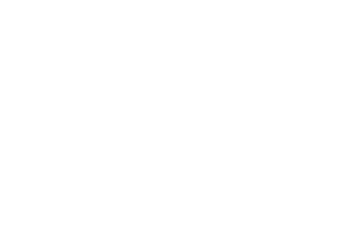

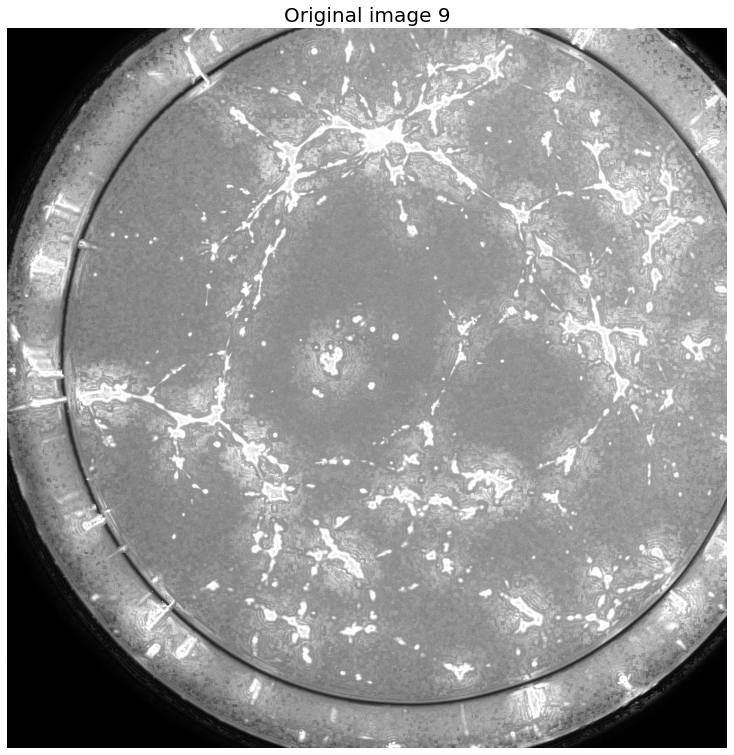

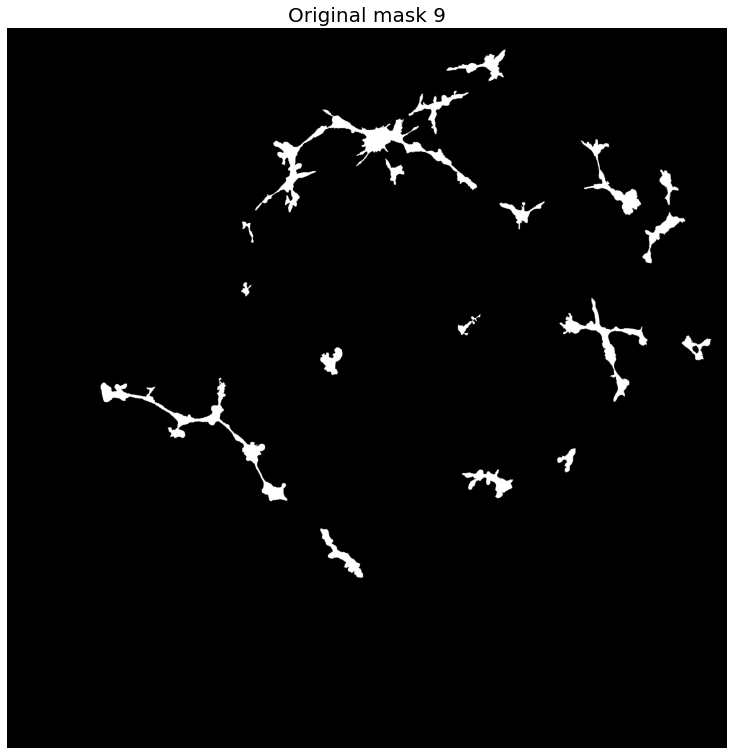

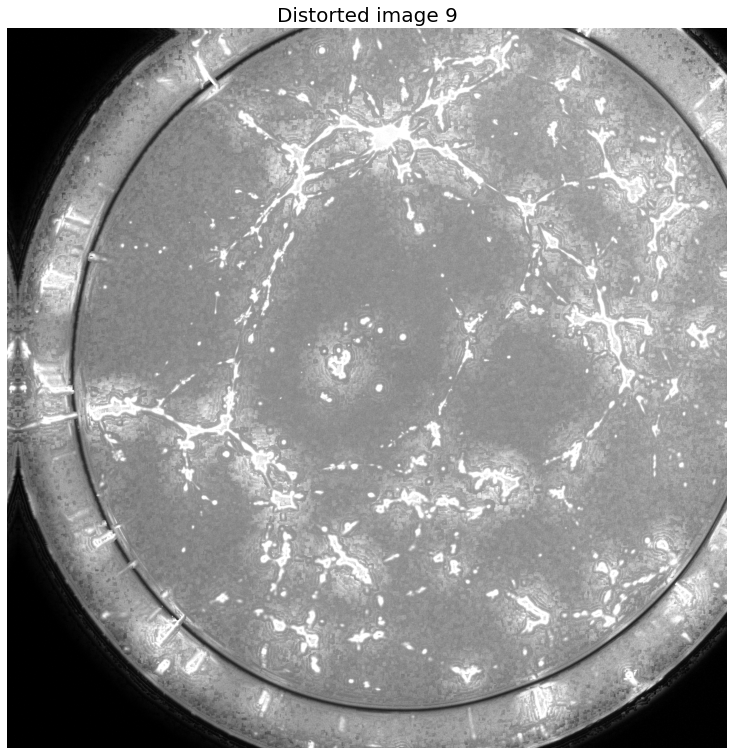

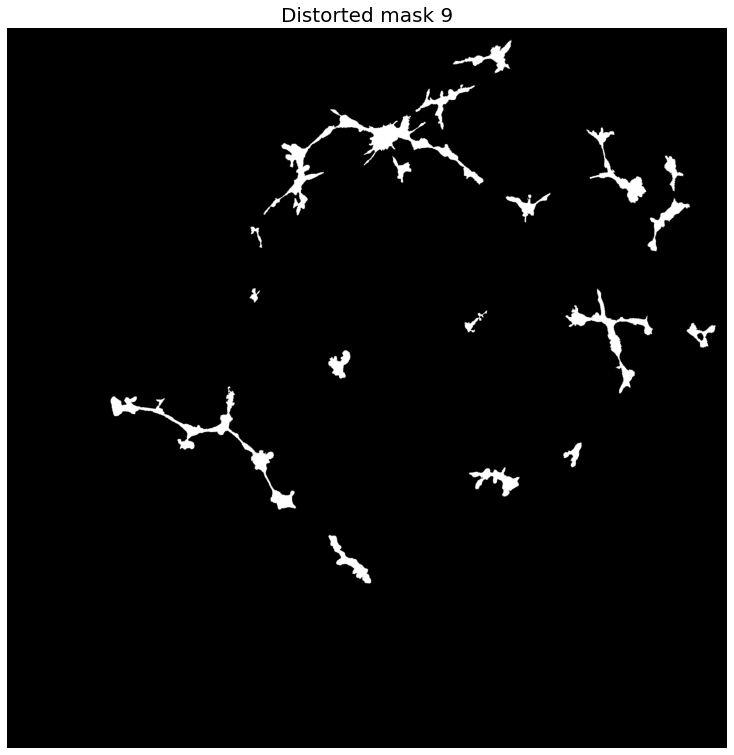

In [34]:
# Show pair n (in both its original and augmented forms)
n = 9
visualize(img_mask_pairs[n], transformed_pairs[n], n)

In [ ]:
# Show all pairs
for i in range(len(img_mask_pairs)):
    visualize(img_mask_pairs[i], transformed_pairs[i], i)